In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.shape

(1338, 7)

In [7]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
dataset.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [11]:
dataset.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [17]:
X_train.shape

(936, 6)

In [29]:
dataset = pd.get_dummies(dataset,columns=['sex','smoker','region'],drop_first=True)

In [33]:
X = dataset.drop('charges', axis=1)  
y = dataset['charges']              

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
print("Coefficients (b):", regressor.coef_)
print("Intercept (a):", regressor.intercept_)

Coefficients (b): [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Intercept (a): -11931.21905032666


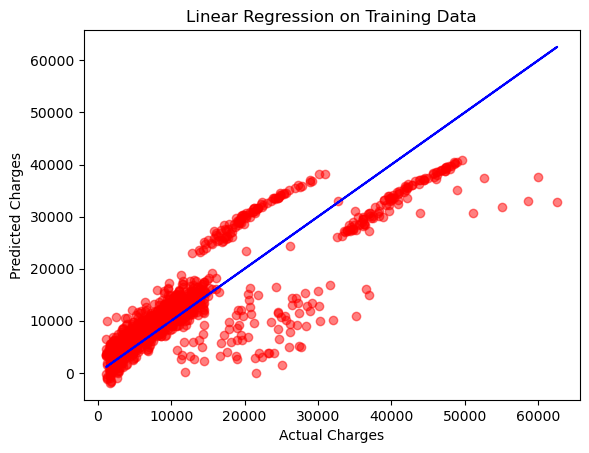

In [47]:
plt.scatter(y_train, regressor.predict(X_train), color='red', alpha=0.5)
plt.plot(y_train, y_train, color='blue')  # Line of perfect prediction
plt.title("Linear Regression on Training Data")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


In [49]:
y_pred = regressor.predict(X_test)


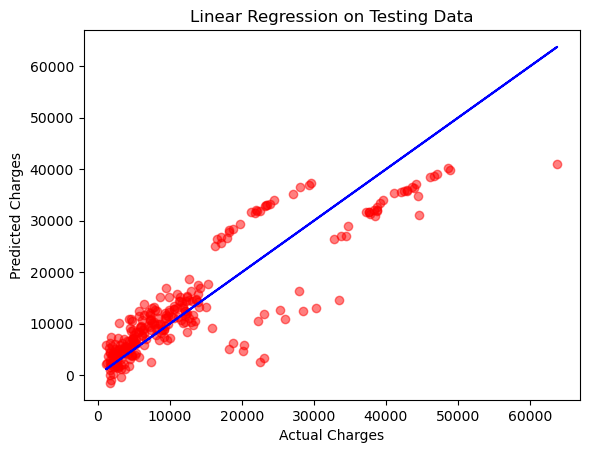

In [51]:
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot(y_test, y_test, color='blue')  # Line of perfect prediction
plt.title("Linear Regression on Testing Data")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [53]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4181.19447375365
MSE: 33596915.85136146
RMSE: 5796.2846592762735


In [57]:
import pickle 
with open('insurance_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved successfully!")


Model saved successfully!


In [59]:
with open('insurance_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [65]:
y_pred_loaded = loaded_model.predict(X_test)

#Checking loaded model
print("MAE (loaded model):", metrics.mean_absolute_error(y_test, y_pred_loaded))
print("MSE (loaded model):", metrics.mean_squared_error(y_test, y_pred_loaded))
print("RMSE (loaded model):", np.sqrt(metrics.mean_squared_error(y_test, y_pred_loaded)))


MAE (loaded model): 4181.19447375365
MSE (loaded model): 33596915.85136146
RMSE (loaded model): 5796.2846592762735
